# Data Cleaning 

## `01` Import libraries 

In [78]:
# for data manipulation
import numpy as np 
import pandas as pd 
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for Normality test 
import statsmodels.api as sm 

## `02` Read & Explore Data 

In [79]:
df = pd.read_csv('glassdoor_jobs.csv')
df = df.drop("Unnamed: 0", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 104.7+ KB


## `03` Clean Data 

### `3.1` Salary estimate

In [80]:
# mark the hourly from the glassdoor est from the employer provided salary 
df = df[df['Salary Estimate'] != '-1']
df['hourly'] = df['Salary Estimate'].apply(lambda x : 1 if 'per hour' in x.lower() else 0)
df['employer_provided_salary'] = df['Salary Estimate'].apply(lambda x : 1 if 'employer provided salary' in x.lower() else 0)
# get rid of extra chars 
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[a-z|A-Z| $().:]', '')

C:\Users\CRIZMA MEGA STORE\AppData\Local\Temp\ipykernel_14812\1095467852.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[a-z|A-Z| $().:]', '')


In [81]:
# split the min and max values
min_max_salary= df['Salary Estimate'].str.split('-', 1, expand=True).apply(pd.to_numeric)
min_max_salary.rename({0 : 'min_salary', 1 : 'max_salary'}, axis=1,  inplace = True)
df = pd.concat([df, min_max_salary], axis=1)
df.drop("Salary Estimate", axis=1, inplace = True)

In [82]:
df['avg_salary'] = df['min_salary'] + df['max_salary'] / 2

### `3.2` Company Name

In [83]:
#Company Name cleaning
df['Company Name'] = df['Company Name'].str.split('\n', 1, expand=True)[0]
df.head(2)

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided_salary,min_salary,max_salary,avg_salary
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,98.5
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,119.0


### `3.3` Job Description

In [84]:
#skills columns for better prediction 
df['Job Description'] = df['Job Description'].str.lower()
'''
check the existence of these skills : 
- python  
- R  
- spark/ pyspark
- AWS
- powerbi
- excel
- tensorflow
- deep learning
- data visualization
- data preparation
'''
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x else 0)
df['r programming'] = df['Job Description'].apply(lambda x: 1 if 'r programming' in x else 0)
df['c++'] = df['Job Description'].apply(lambda x: 1 if 'c++' in x else 0)
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x else 0)
df['sql'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x else 0)
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x else 0)
df['powerbi'] = df['Job Description'].apply(lambda x: 1 if 'powerbi' in x else 0)
df['tensorflow'] = df['Job Description'].apply(lambda x: 1 if 'tensorflow' in x else 0)
df['keras'] = df['Job Description'].apply(lambda x: 1 if 'keras' in x else 0)
df['scikit'] = df['Job Description'].apply(lambda x: 1 if 'scikit' in x else 0)
df['tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x else 0)
df['data visualization'] = df['Job Description'].apply(lambda x: 1 if 'data visualization' in x else 0)
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x else 0)
df['docker'] = df['Job Description'].apply(lambda x: 1 if 'docker' in x else 0)
df['deployment'] = df['Job Description'].apply(lambda x: 1 if 'deployment' in x else 0)



In [85]:
print(df.python.value_counts())
print(df['r programming'].value_counts())
print(df['c++'].value_counts())
print(df['sql'].value_counts())
print(df['excel'].value_counts())
print(df['keras'].value_counts())
print(df['tableau'].value_counts())
print(df['scikit'].value_counts())
print(df.spark.value_counts())
print(df.powerbi.value_counts())
print(df.tensorflow.value_counts())
print(df['data visualization'].value_counts())
print(df.aws.value_counts())
print(df.docker.value_counts())
print(df.deployment.value_counts())


1    392
0    350
Name: python, dtype: int64
0    707
1     35
Name: r programming, dtype: int64
0    711
1     31
Name: c++, dtype: int64
1    380
0    362
Name: sql, dtype: int64
1    388
0    354
Name: excel, dtype: int64
0    713
1     29
Name: keras, dtype: int64
0    594
1    148
Name: tableau, dtype: int64
0    688
1     54
Name: scikit, dtype: int64
0    575
1    167
Name: spark, dtype: int64
0    719
1     23
Name: powerbi, dtype: int64
0    671
1     71
Name: tensorflow, dtype: int64
0    632
1    110
Name: data visualization, dtype: int64
0    566
1    176
Name: aws, dtype: int64
0    705
1     37
Name: docker, dtype: int64
0    667
1     75
Name: deployment, dtype: int64


### `3.4` Job Title

In [86]:
def title_simplifier(title):
    if 'data scientist' in title or 'data science' in title:
        return 'data scientist'
    elif 'data engineer' in title or 'data management' in title or 'data architect' in title:
        return 'data engineer'
    elif 'analyst' in title or 'analytics' in title:
        return 'data analyst'
    elif 'machine learning' in title:
        return 'MLE'
    elif 'software engineer' in title:
        return 'SWE'
    elif 'manager' in title:
        return 'manager'
    elif 'research scientist' in title or 'r&d' in title:
        return 'Research Scientist'
    elif 'director' in title:
        return 'director'
    else:
        return 'na'

In [87]:
def seniority(title):
    if 'sr' in title or 'senior' in title or 'lead' in title or 'principal' in title  or 'expert' in title :
            return 'senior'
    elif 'jr' in title or 'jr.' in title or 'entry level' in title:
        return 'jr'
    elif 'associate' in title: 
        return 'associate'
    elif 'director' in title: 
        return 'director'
    elif 'manager' in title: 
        return 'manager'
    elif 'consult' in title: 
        return 'consult'
    else:
        return 'na'

In [88]:
df['Job Title'] = df['Job Title'].str.lower()
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['experience_lvl'] = df['Job Title'].apply(seniority)

In [89]:
df['job_simp'].value_counts()

data scientist        313
na                    131
data analyst          123
data engineer         122
MLE                    22
Research Scientist     20
director                5
SWE                     4
manager                 2
Name: job_simp, dtype: int64

In [90]:
df['experience_lvl'].value_counts()

na           446
senior       222
associate     27
manager       23
director      12
consult       10
jr             2
Name: experience_lvl, dtype: int64

In [91]:
na_in_experience = df[df['experience_lvl'] == 'na']
na_in_title = df[df['job_simp'] == 'na']

### `3.5` Competitor count

In [92]:
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

### `3.6` hourly wage to annual

In [93]:
''' 
multiplying the hourly rate by 2, here what it happens under the hood: 2000 = 8hrs/day * 5 days/week * 50 weeks.
The year has 52 weeks but 2 of those weeks are assigned to holidays and vacation time.
we multiply by 2 for thousand 
'''
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

### `3.7` age of company 


In [94]:
df['company_age'] = df.Founded.apply(lambda x: x if x <1 else 2022 - x)

### `3.8` Job state  

In [95]:

df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [96]:
df.replace(to_replace = '-1', value = np.nan, inplace = True)

# `04` Exploratory Data Analysis (EDA) 

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 742 non-null    object 
 1   Job Description           742 non-null    object 
 2   Rating                    742 non-null    float64
 3   Company Name              742 non-null    object 
 4   Location                  742 non-null    object 
 5   Headquarters              741 non-null    object 
 6   Size                      741 non-null    object 
 7   Founded                   742 non-null    int64  
 8   Type of ownership         741 non-null    object 
 9   Industry                  732 non-null    object 
 10  Sector                    732 non-null    object 
 11  Revenue                   741 non-null    object 
 12  Competitors               282 non-null    object 
 13  hourly                    742 non-null    int64  
 14  employer_p

In [98]:
## separating the categorical features and numerical features
skills_cols = ['python', 'deployment', 'docker', 'aws', 'tableau',
                'scikit', 'keras', 'tensorflow', 'powerbi',
                "spark", "sql", "excel", 'excel', "c++",
                'r programming', 'data visualization' ]
num_cols = list(set(df.select_dtypes(exclude=[object]).columns)- set(skills_cols))
cat_cols = list(set(df.select_dtypes(include=[object]).columns) - set(['Job Title', 'Job Description', 'Company Name', 'Competitors', 'Industry', 'Location', 'Headquarters']))  
print(f'numerical columns = {len(num_cols)}')
print(f'categorical columns = {len(cat_cols)}')

numerical columns = 9
categorical columns = 7


### `4.1` Check Normality

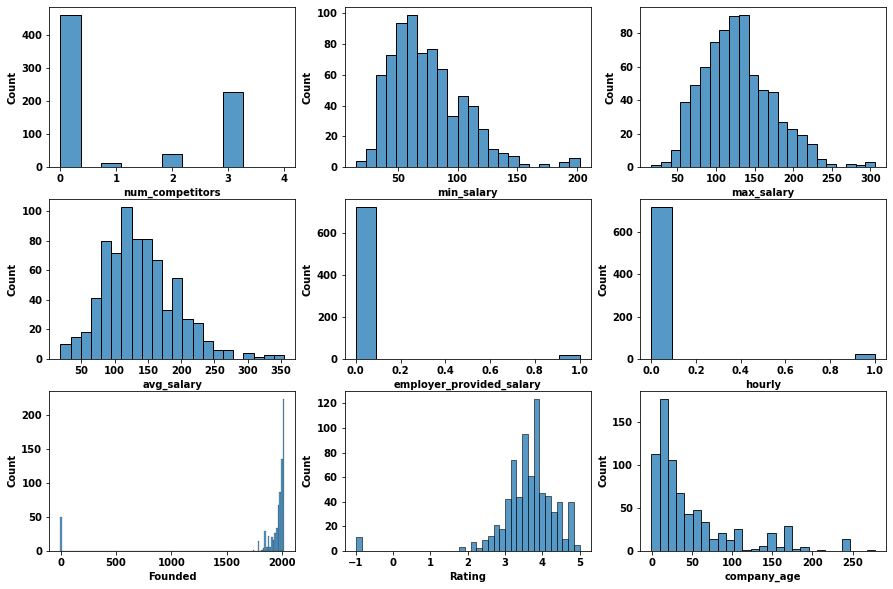

In [99]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df[num_cols]):
    ax = plt.subplot(3, 3, i+1)
    sns.histplot(df[col], ax=ax)
plt.show()

### `4.2` Check Outliers

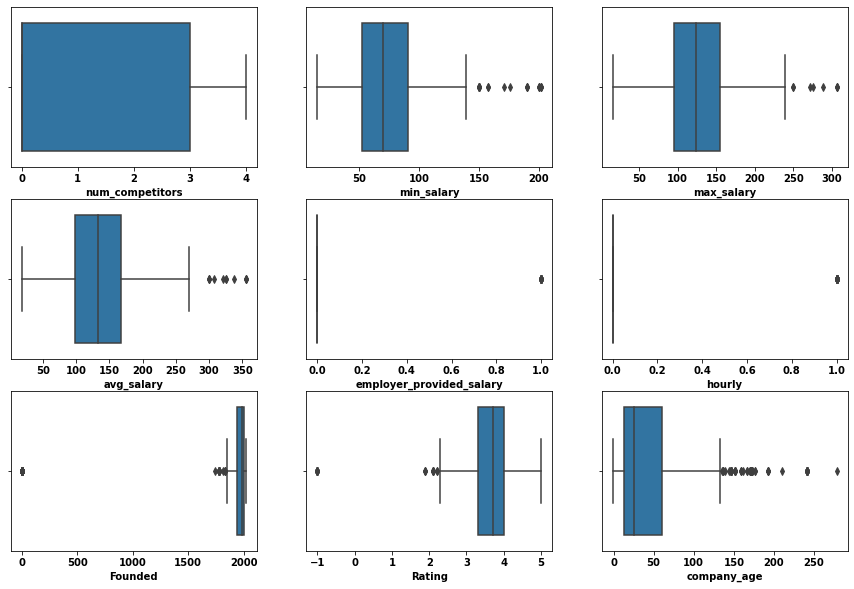

In [100]:
#Check Outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(df[num_cols]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x = df[col]) 
plt.show()


### `4.3` Check Categorical data distribution

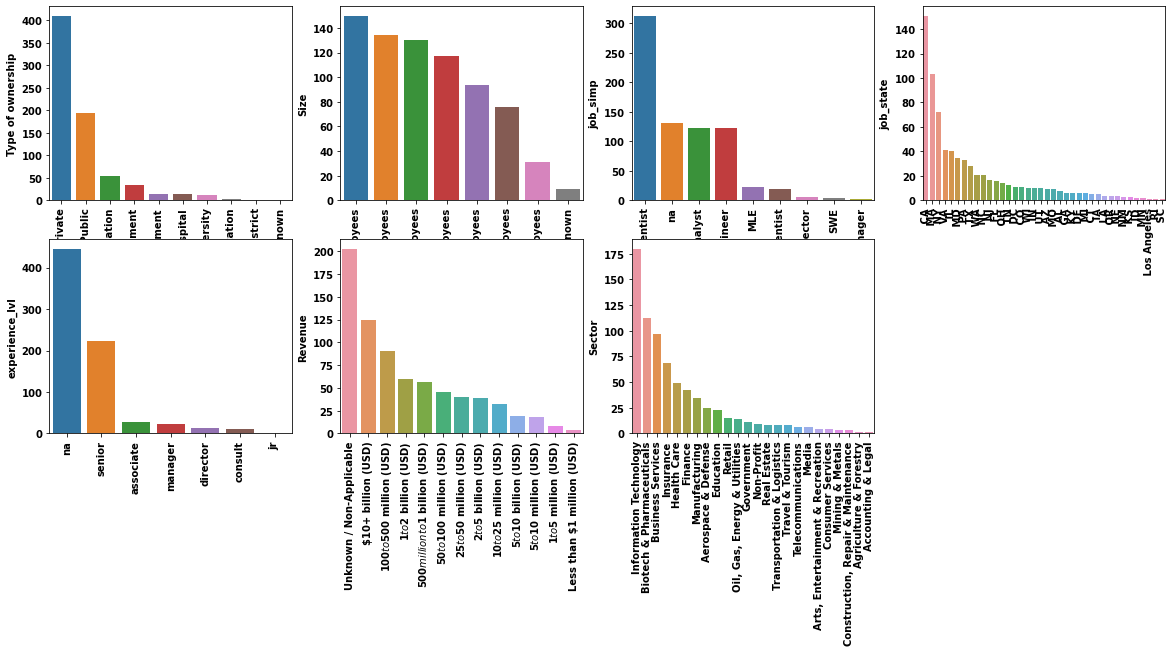

In [101]:
#Check categorical cols
plt.figure(figsize=(20,25))
for i, col in enumerate(cat_cols):
    cat_num = df[col].value_counts()
    plt.subplot(6, 4, i+1)
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


[Text(0, 0, 'Unknown / Non-Applicable'),
 Text(1, 0, '$10+ billion (USD)'),
 Text(2, 0, '$100 to $500 million (USD)'),
 Text(3, 0, '$1 to $2 billion (USD)'),
 Text(4, 0, '$500 million to $1 billion (USD)'),
 Text(5, 0, '$50 to $100 million (USD)'),
 Text(6, 0, '$25 to $50 million (USD)'),
 Text(7, 0, '$2 to $5 billion (USD)'),
 Text(8, 0, '$10 to $25 million (USD)'),
 Text(9, 0, '$5 to $10 billion (USD)'),
 Text(10, 0, '$5 to $10 million (USD)'),
 Text(11, 0, '$1 to $5 million (USD)'),
 Text(12, 0, 'Less than $1 million (USD)')]

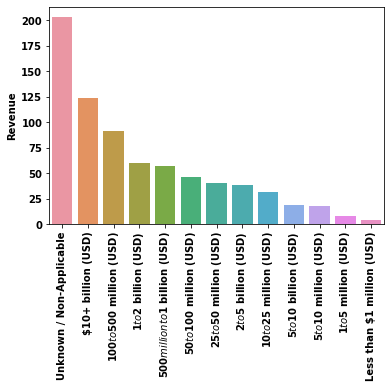

In [102]:
Revenue_num = df['Revenue'].value_counts()
chart = sns.barplot(x=Revenue_num.index, y=Revenue_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


[Text(0, 0, '1001 to 5000 employees'),
 Text(1, 0, '501 to 1000 employees'),
 Text(2, 0, '10000+ employees'),
 Text(3, 0, '201 to 500 employees'),
 Text(4, 0, '51 to 200 employees'),
 Text(5, 0, '5001 to 10000 employees'),
 Text(6, 0, '1 to 50 employees'),
 Text(7, 0, 'Unknown')]

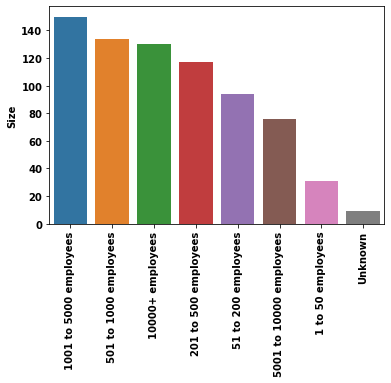

In [103]:
size_num = df['Size'].value_counts()
chart = sns.barplot(x=size_num.index, y=size_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


[Text(0, 0, 'Company - Private'),
 Text(1, 0, 'Company - Public'),
 Text(2, 0, 'Nonprofit Organization'),
 Text(3, 0, 'Subsidiary or Business Segment'),
 Text(4, 0, 'Government'),
 Text(5, 0, 'Hospital'),
 Text(6, 0, 'College / University'),
 Text(7, 0, 'Other Organization'),
 Text(8, 0, 'School / School District'),
 Text(9, 0, 'Unknown')]

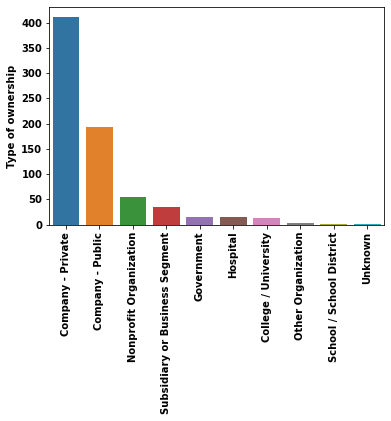

In [104]:
ownership_num = df['Type of ownership'].value_counts()
chart = sns.barplot(x=ownership_num.index, y=ownership_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


graph for Location: total = 20


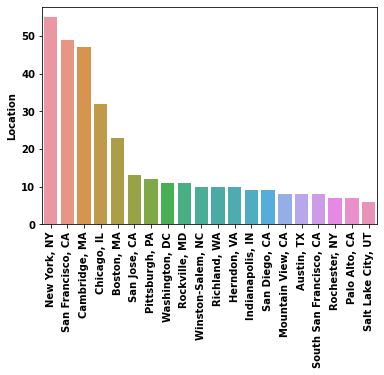

graph for Headquarters: total = 20


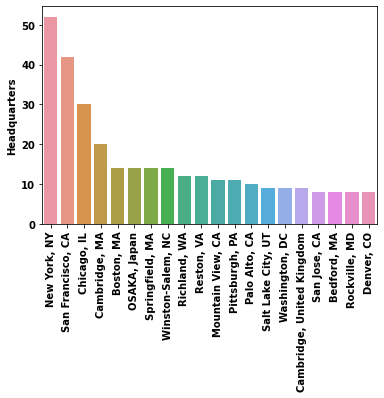

graph for Company Name: total = 20


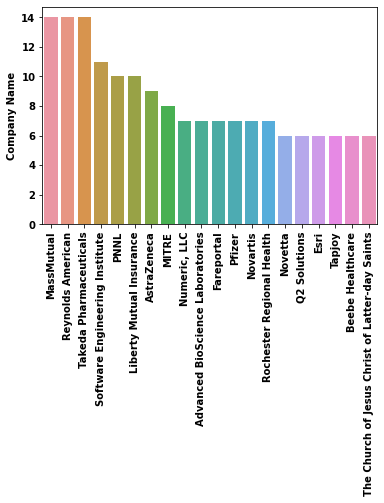

In [105]:
for i in df[['Location','Headquarters','Company Name']].columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### `4.4` Check Duplicates

In [106]:
#check Duplicates
df.duplicated().sum()

275

### `4.5` Check highly correlated features

<AxesSubplot:>

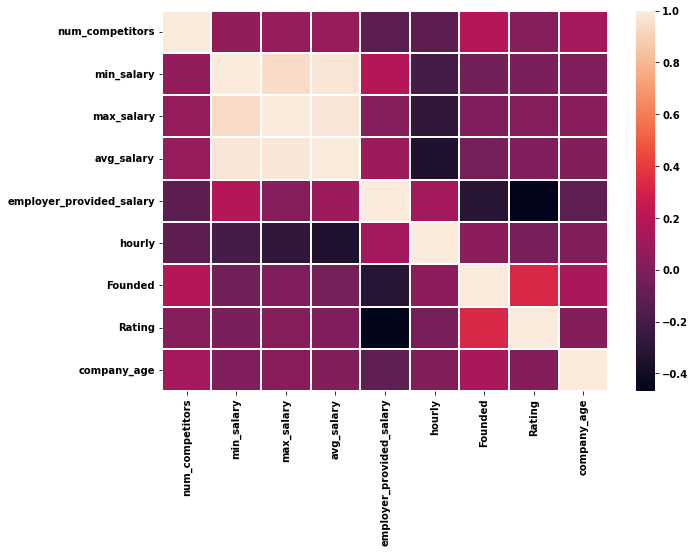

In [107]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
corr_matrix = df[num_cols].corr()
plt.subplots(figsize = (10, 7))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

### `4.6` general explorations

In [108]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_simp,
director,178.200000
MLE,171.613636
data scientist,163.348243
data engineer,142.524590
SWE,126.625000
Research Scientist,123.050000
manager,114.750000
na,111.652672
data analyst,90.552846


In [109]:
pd.pivot_table(df, index = ['job_simp','experience_lvl'], values = 'avg_salary').sort_values('avg_salary', ascending=False)

,,avg_salary
job_simp,experience_lvl,
data scientist,director,263.611111
MLE,senior,192.071429
director,associate,191.000000
data scientist,senior,187.475490
Research Scientist,senior,185.875000
data engineer,senior,170.171053
director,director,169.666667
MLE,na,162.066667
data engineer,associate,161.800000


In [110]:
df_pivots = ['Industry', 'Sector', 'Revenue', 'num_competitors', 'hourly', 'employer_provided_salary', 'Type of ownership']
for i in df_pivots:
    print(f'------------------------------------------ {i} ------------------------------------------')
    print(pd.pivot_table(df, index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

------------------------------------------ Industry ------------------------------------------
                                          avg_salary
Industry                                            
Other Retail Stores                       226.500000
Financial Analytics & Research            200.812500
Motion Picture Production & Distribution  197.000000
Health, Beauty, & Fitness                 193.500000
Telecommunications Services               182.250000
Auctions & Galleries                      175.500000
Brokerage Services                        174.500000
Internet                                  171.931034
Investment Banking & Asset Management     163.400000
TV Broadcast & Cable Networks             161.250000
Enterprise Software & Network Solutions   159.035714
Computer Hardware & Software              157.635593
Accounting                                156.000000
Biotech & Pharmaceuticals                 151.580357
Insurance Agencies & Brokerages           150.500000
K-12

In [111]:
skill_labels = ['python', 'spark', 'aws', 'excel', 'sql', 'keras', 'tensorflow', 'data visualization',
                'scikit', 'docker', 'tableau', 'powerbi', 'r programming', 'deployment', 'c++']
            
skills_by_title = df.groupby('job_simp')[skill_labels].sum()
skills_by_title 

,python,spark,aws,excel,sql,keras,tensorflow,data visualization,scikit,docker,tableau,powerbi,r programming,deployment,c++
job_simp,,,,,,,,,,,,,,,
MLE,18,4,6,7,13,0,9,0,7,3,0,0,0,2,3
Research Scientist,3,0,2,8,0,0,1,0,0,1,0,0,0,1,0
SWE,1,0,0,3,1,0,0,3,0,1,0,0,0,3,0
data analyst,39,6,11,91,89,0,0,28,0,0,56,7,2,4,3
data engineer,78,68,61,56,90,0,2,6,0,23,11,1,7,24,3
data scientist,240,84,79,155,176,29,59,73,47,7,76,11,26,38,20
director,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0
manager,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
na,12,5,15,65,10,0,0,0,0,2,5,4,0,3,2


In [112]:
cat_cols

['Type of ownership',
 'Size',
 'job_simp',
 'job_state',
 'experience_lvl',
 'Revenue',
 'Sector']

# Observations :

After Exploring the data, I did notice the following: 
- duplicates
- imbalance 
- outliers 
- skewness 

In [113]:
# upload the cleaned version to work on 
df.to_csv('cleaned_data.csv')